# CI project :Natural-inspired pattern Recognition for Classification Proplem



### Hyperparameter Optimization (HPO) of Machine Learning Models
####  Tradional Algorithms versus Natural inspired Algorithms

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score
from sklearn import datasets
from sklearn.svm import SVC ,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

## Load MNIST dataset
The MNIST database  is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST database has a training set of 60,000 examples, and a test set of 10,000 examples.

In [ ]:

# Load dataset
dataset = datasets.load_digits()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

## Baseline Machine Learning Models: Classifiers with Default Hyperparameters

### Using 3-Fold Cross-Validation

In [20]:
#SVM
clf = SVC()
clf.fit(X,y)
scores = cross_val_score(clf, X ,y, cv=3 , scoring ='accuracy')
print(" Accuracy:"+ str(scores.mean()))



 Accuracy:0.9699499165275459


## Tradition Parameter tunning Methods  Algorithm 1: Grid Search
Search all the given hyper-parameter configurations

**Advantages:**
* Simple implementation.  

**Disadvantages:**  
* Time-consuming,
* Only efficient with categorical HPs.

In [21]:
# SVM optimized by GridSearchCv
from sklearn.model_selection import GridSearchCV
#Define hyperparameter Configuration space
svm_params = {
    'C':[1,10,100],
    'kernel' :['linear','poly','rbf','sigmoid'],
    'gamma':[0.0001,0.001,0.04,1]
}
clf = SVC()
grid =GridSearchCV(clf,svm_params ,cv=3 ,scoring = 'accuracy')
grid.fit(X,y)
print(grid.best_params_)
print("Accuracy:"+str(grid.best_score_))


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy:0.9760712298274902


##  Algorithm 2: Random Search
Randomly search hyper-parameter combinations in the search space

**Advantages:**
* More efficient than GS.
* Enable parallelization.

**Disadvantages:**  
* Not consider previous results.
* Not efficient with conditional HPs.

In [22]:
#SVM
from scipy import stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'C': stats.uniform(0,50),
    "kernel":['linear','poly','rbf','sigmoid'],
    'gamma':[0.0001,0.001,0.03,1]
}
n_iter_search=20
clf = SVC(gamma='scale')
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'C': np.float64(17.384049752444447), 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy:0.9760712298274902


## Bacterial Foraging Optimization (BFO) with Dynamic Step Size and Mutation

Bacterial Foraging Optimization (BFO) is a bio-inspired metaheuristic algorithm that mimics the foraging behavior of *E. coli* bacteria. The algorithm optimizes solutions by simulating chemotaxis (movement), reproduction, and elimination-dispersal.





### Advantages

- **Exploration → Exploitation**: Dynamic step size enables wide search initially and precise tuning later.
- **Faster Convergence**: Mutation and step decay help find good solutions quickly.
- **Avoids Local Optima**: Mutation introduces random jumps that may escape poor local minima.


---

###  Disadvantages

- **Premature Convergence Risk**: If step size decays too fast or mutation is too weak, the algorithm may settle early.
- **Hyperparameter Sensitivity**: Performance depends heavily on mutation rate, decay factor, and swim length.
- **Slow in High Dimensions**: Like many swarm methods, performance degrades with more parameters.



In [26]:

# Parameters of BfO
S = 40                # Number of bacteria
Nc = 8                # Chemotactic steps
Ns = 6                # Swim length
Nre = 50              # Reproduction steps (generations)
Ned = 1               # Elimination-dispersal steps
Ped = 0.25            # Probability of elimination-dispersal
dim = 3               # Number of hyperparameters
C_init = 0.4          # Initial step size
mutation_rate = 0.2   # genetic mutation
mutation_strength = 0.6
early_stopping_threshold = 1e-4
patience = 10

# SVM hyperparameter bounds: [C, gamma, kernel_type (encoded)]
bounds = [(1, 100), (1e-4, 1), (0, 3.999)]  # kernel index: 0 to 3.999
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

# Objective function
def objective_function(params):
    C, gamma, kernel_idx = params
    kernel_idx = int(np.clip(kernel_idx, 0, 3))
    kernel = kernel_list[kernel_idx]
    model = SVC(C=C, gamma=gamma, kernel=kernel)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    return 1 - np.mean(scores)

# Initialization
P = np.array([np.random.uniform(low, high, S) for (low, high) in bounds]).T
C_step = np.ones(S) * C_init

def tumble():
    delta = np.random.randn(dim)
    return delta / np.linalg.norm(delta)

def clip_to_bounds(x):
    return np.clip(x, [b[0] for b in bounds], [b[1] for b in bounds])

# Tracking
best_fitness_history = []
avg_fitness_history = []
no_improve_counter = 0
last_best = np.inf

# Main BFO Loop
for ell in range(Ned):
    for gen in range(Nre):
        fitness = np.array([objective_function(x) for x in P])
        best_idx = np.argmin(fitness)
        best_fitness = fitness[best_idx]
        avg_fitness = np.mean(fitness)
        best_fitness_history.append(best_fitness)
        avg_fitness_history.append(avg_fitness)

        print(f"Generation {gen+1} | Best Fitness: {best_fitness:.6f} | Avg Fitness: {avg_fitness:.6f} | Best Params: {P[best_idx]}")

        # Early stopping
        if abs(last_best - best_fitness) < early_stopping_threshold:
            no_improve_counter += 1
            if no_improve_counter >= patience:
                print(f"\nEarly Stopping at Generation {gen+1}: No improvement for {patience} generations.")
                break
        else:
            no_improve_counter = 0
        last_best = best_fitness

        # Chemotaxis
        for i in range(S):
            delta = tumble()
            P[i] = clip_to_bounds(P[i] + C_step[i] * delta)
            for _ in range(Ns):
                new_position = clip_to_bounds(P[i] + C_step[i] * delta)
                if objective_function(new_position) < objective_function(P[i]):
                    P[i] = new_position
                else:
                    break
            if np.random.rand() < mutation_rate:
                mutation = np.random.randn(dim) * mutation_strength
                P[i] = clip_to_bounds(P[i] + mutation)

        # Reproduction
        idx = np.argsort(fitness)
        P = P[idx]
        half_S = S // 2
        P[half_S:] = P[:half_S]

        # Step size decay
        C_step *= 0.97

    # Elimination-Dispersal
    for i in range(S):
        if np.random.rand() < Ped:
            P[i] = np.array([np.random.uniform(low, high) for (low, high) in bounds])

# Final Evaluation
best_idx = np.argmin([objective_function(x) for x in P])
best_params = P[best_idx]
C_best, gamma_best, kernel_idx = best_params
kernel_best = kernel_list[int(np.clip(kernel_idx, 0, 3))]

print("\n Best Parameters Found:")
print("  C =", C_best)
print("  Gamma =", gamma_best)
print("  Kernel =", kernel_best)

model = SVC(C=C_best, gamma=gamma_best, kernel=kernel_best)
model.fit(X_train, y_train)
print("Test Accuracy:", model.score(X_test, y_test))


Generation 1 | Best Fitness: 0.015310 | Avg Fitness: 0.478984 | Best Params: [31.68109004  0.20194518  1.07760294]
Generation 2 | Best Fitness: 0.014614 | Avg Fitness: 0.064544 | Best Params: [3.88694055e+01 1.00000000e-04 1.48686846e+00]
Generation 3 | Best Fitness: 0.015310 | Avg Fitness: 0.062491 | Best Params: [39.24642411  0.09174782  1.48815325]
Generation 4 | Best Fitness: 0.012526 | Avg Fitness: 0.235177 | Best Params: [5.41302630e+01 1.00000000e-04 1.16130503e+00]
Generation 5 | Best Fitness: 0.014614 | Avg Fitness: 0.059081 | Best Params: [3.90223864e+01 1.00000000e-04 1.79895603e+00]
Generation 6 | Best Fitness: 0.014614 | Avg Fitness: 0.015901 | Best Params: [3.98663157e+01 1.00000000e-04 1.80316137e+00]
Generation 7 | Best Fitness: 0.014614 | Avg Fitness: 0.061691 | Best Params: [3.99697698e+01 1.00000000e-04 1.96152198e+00]
Generation 8 | Best Fitness: 0.014614 | Avg Fitness: 0.058873 | Best Params: [4.01236246e+01 1.00000000e-04 1.82214165e+00]
Generation 9 | Best Fitnes

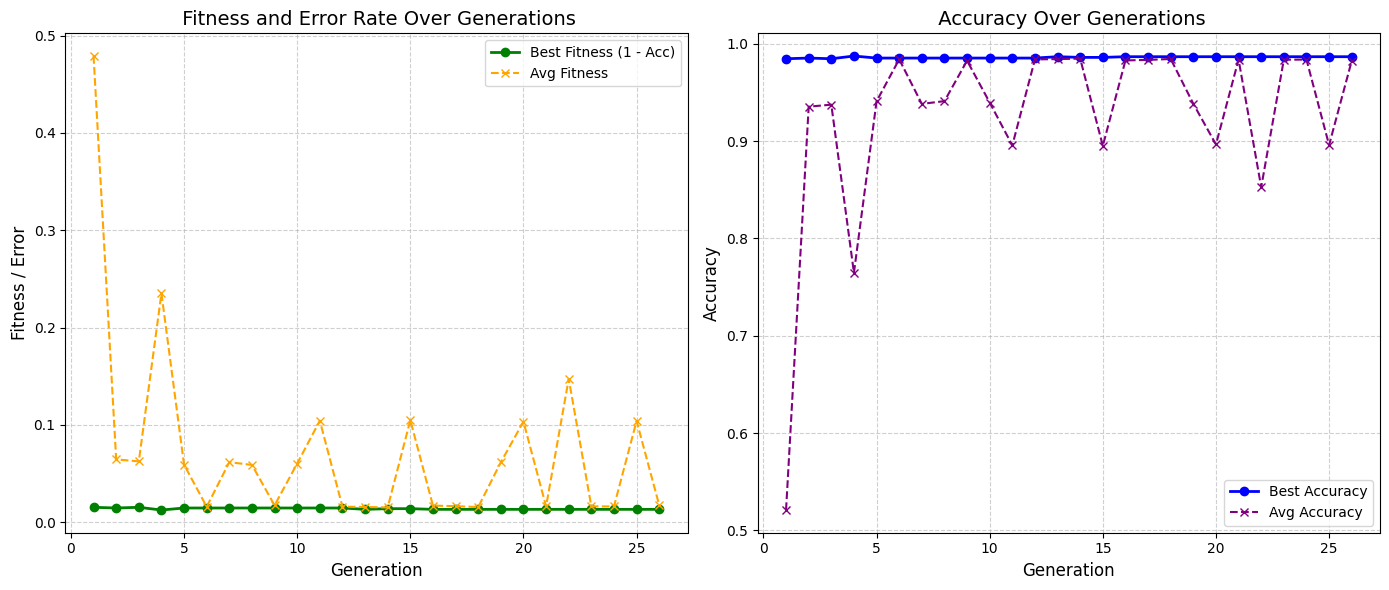

In [29]:
generations = np.arange(1, len(best_fitness_history) + 1)
best_fitness = np.array(best_fitness_history)
avg_fitness = np.array(avg_fitness_history)
error_rate = best_fitness  # Since fitness = 1 - accuracy

# Optional: Convert to accuracy if you want to plot it
best_accuracy = 1 - best_fitness
avg_accuracy = 1 - avg_fitness

plt.figure(figsize=(14, 6))

# Fitness and Error Rate Plot
plt.subplot(1, 2, 1)
plt.plot(generations, best_fitness, label='Best Fitness (1 - Acc)', color='green', linewidth=2, marker='o')
plt.plot(generations, avg_fitness, label='Avg Fitness', color='orange', linestyle='--', marker='x')
plt.title(' Fitness and Error Rate Over Generations', fontsize=14)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Fitness / Error', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(generations, best_accuracy, label='Best Accuracy', color='blue', linewidth=2, marker='o')
plt.plot(generations, avg_accuracy, label='Avg Accuracy', color='purple', linestyle='--', marker='x')
plt.title(' Accuracy Over Generations', fontsize=14)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
